## 1

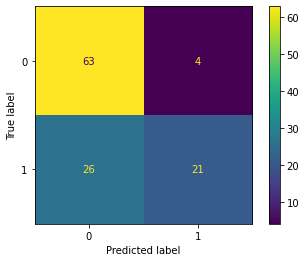

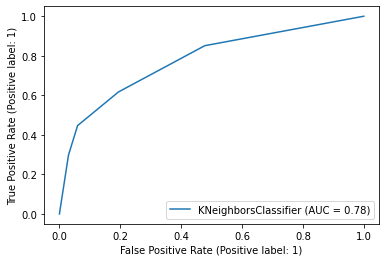

'AUC: 0.6935535090504922'

'F1 Score: 0.5833333333333334'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('wisconsin.csv')

# substituindo as letras em números para que o treinamento não dê erros
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1}) 

# removendo a última coluna - aparentemente houve algum erro na hora de importá-la
df = df.dropna(axis=1)

# split entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis', axis=1), df['diagnosis'], test_size=0.2, random_state=0)

# criando o modelo
modelo = KNeighborsClassifier().fit(X_train, y_train)

# gerando as predições
y_pred = modelo.predict(X_test)

# matriz de confusão
plot_confusion_matrix(modelo, X_test, y_test)
plt.show()

# ROC
plot_roc_curve(modelo, X_test, y_test)
plt.show()

# AUC
display(f'AUC: {roc_auc_score(y_test, y_pred)}')

# F1 score
display(f'F1 Score: {f1_score(y_test, y_pred)}')

## 2

In [5]:
import pandas as pd
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv('expectancy.csv')

# uma boa sugestão é a de tratar as colunas que são textos (Country e Status)
# isto pode ser feito com o LabelEncoder e o OneHotEncoder do scikit-learn
# removerei ambas para fins de brevidade do algoritmo
df = df.drop(['Country', 'Status'], axis=1)

# na disciplina de Preparação e Análise Exploratória de Dados você aprendeu 
# técnicas de imputação de dados ausentes. Se ainda não passou por lá
# faremos somente a remoção de todas as linhas com dados nulos, mas
# em bases reais recomendo que você tente ao menos tratar estes dados
# ao invés de somente removê-los
df = df.dropna()

# split entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop('Life expectancy ', axis=1), df['Life expectancy '], test_size=0.2, random_state=0)

# criando o modelo
modelo = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

# gerando as predições
y_pred = modelo.predict(X_test)

# MAE
display(f"MAE: {mean_absolute_error(y_test, y_pred)}")

# R2
display(f"R2: {r2_score(y_test, y_pred)}")

# MSE
display(f"MSE: {mean_squared_error(y_test, y_pred)}")

# RMSE
display(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

'MAE: 1.540909090909091'

'R2: 0.9200456228183016'

'MSE: 6.908636363636363'

'RMSE: 2.628428496960943'

## 3

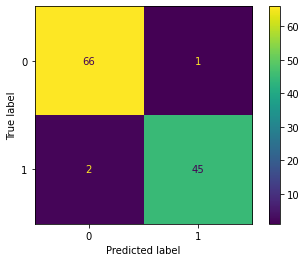

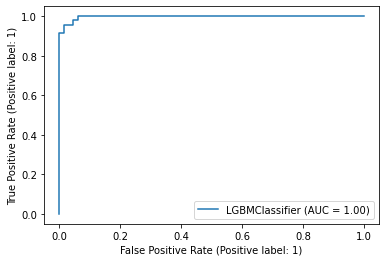

'AUC: 0.971260717688155'

'F1 Score: 0.967741935483871'

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('wisconsin.csv')

# substituindo as letras em números para que o treinamento não dê erros
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1}) 

# removendo a última coluna - aparentemente houve algum erro na hora de importá-la
df = df.dropna(axis=1)

# split entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis', axis=1), df['diagnosis'], test_size=0.2, random_state=0)

# criando o modelo
modelo = LGBMClassifier(random_state=0).fit(X_train, y_train)

# gerando as predições
y_pred = modelo.predict(X_test)

# matriz de confusão
plot_confusion_matrix(modelo, X_test, y_test)
plt.show()

# ROC
plot_roc_curve(modelo, X_test, y_test)
plt.show()

# AUC
display(f'AUC: {roc_auc_score(y_test, y_pred)}')

# F1 score
display(f'F1 Score: {f1_score(y_test, y_pred)}')